In [23]:
import os
os.chdir("F:/Game of thrones") 

In [24]:
import pandas as pd
book1 = pd.read_csv('book1.csv')
book1.head()


,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [25]:
import networkx as nx
G_book1 = nx.Graph() 

In [29]:
for _ ,edge in book1.iterrows(): 
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)
    

    

In [30]:
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Sansa-Stark', 0.18817204301075272), ('Robb-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Joffrey-Baratheon', 0.16129032258064518), ('Cersei-Lannister', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


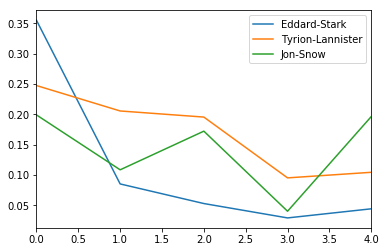

In [31]:
%matplotlib inline
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

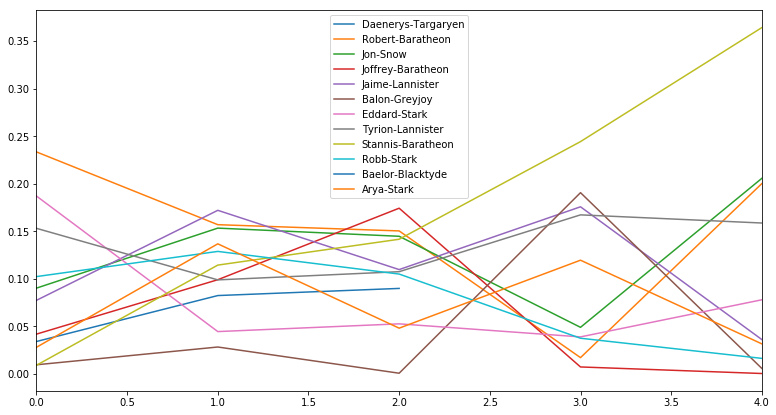

In [32]:
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
betweenness_evol_df = pd.DataFrame(evol)
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

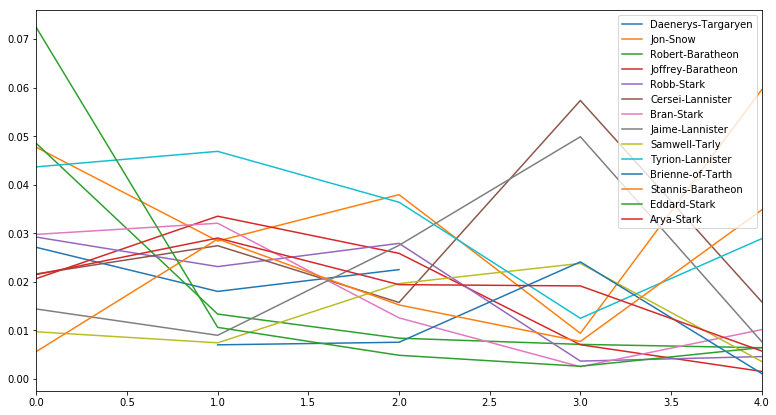

In [33]:
evol = evol = [nx.pagerank(book) for book in books]
pagerank_evol_df = pd.DataFrame(evol)
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))
    
    

In [34]:
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]
cor = pd.DataFrame.from_records(measures)
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000
